# Task-1 Titanic Classification #

## Importing Necessary Libraries ##

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


## Loading Dataset ##

In [3]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

## Data Exploration ##

In [4]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [5]:
data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [6]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
data.shape

(887, 8)

In [8]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


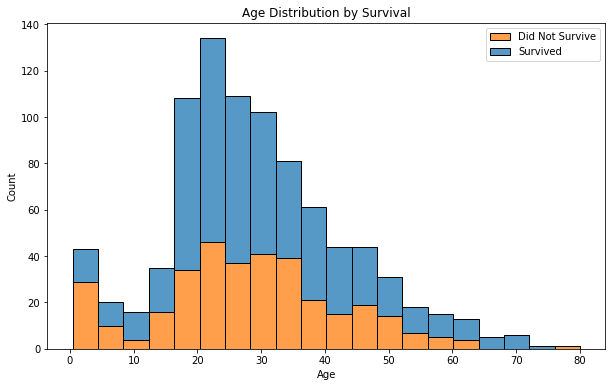

In [10]:
# Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

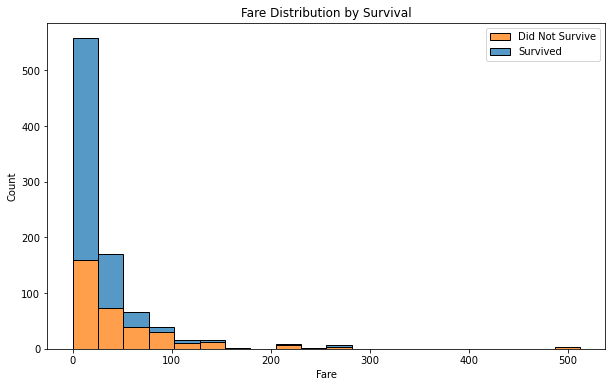

In [11]:
# Fare Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fare', hue='Survived', multiple='stack', bins=20)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

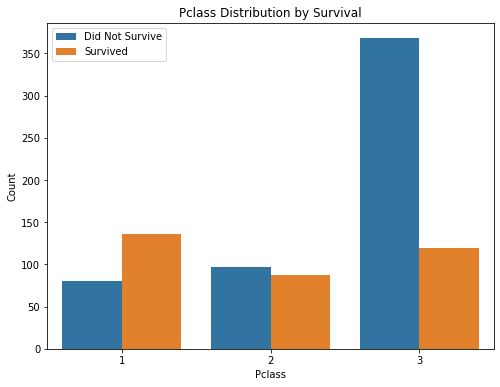

In [12]:
# Pclass Distribution by Survival
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title("Pclass Distribution by Survival")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()


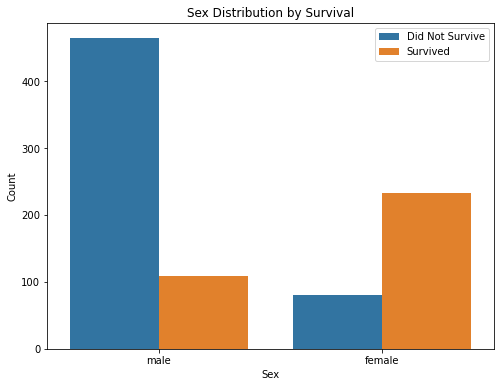

In [13]:
# Sex Distribution by Survival
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title("Sex Distribution by Survival")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

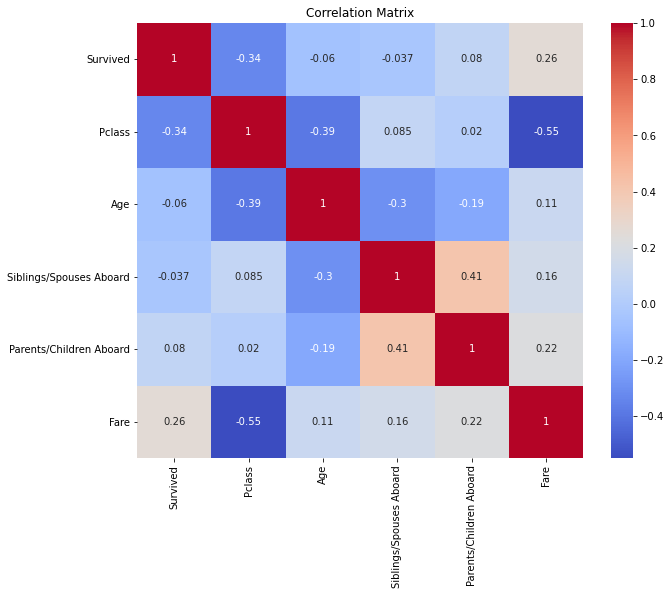

In [14]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Data Preprocessing ##

In [15]:
data.drop(['Name'], axis=1, inplace=True)

In [16]:
data.isna().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [17]:
duplicated_rows = data[data.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 70


In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

## Spliting the data into feature(X) and target(Y) ##

In [20]:
X = data.drop('Survived',axis=1)
Y = data['Survived']

## Splitting data into training and testing sets ##

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Feature Scaling ##

In [22]:
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(X_train)
x_tested_scaled = scaler.transform(X_test)

## Initialize and train the random forest model ## 

In [23]:
model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(x_trained_scaled, y_train)

RandomForestClassifier(random_state=42)

## Predict on scaled testing data ##

In [24]:
y_pred = model.predict(x_tested_scaled)

## Calculate the accuracy ##

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy:{accuracy:.2f}")

accuracy:0.79


## Confusion matrix ##

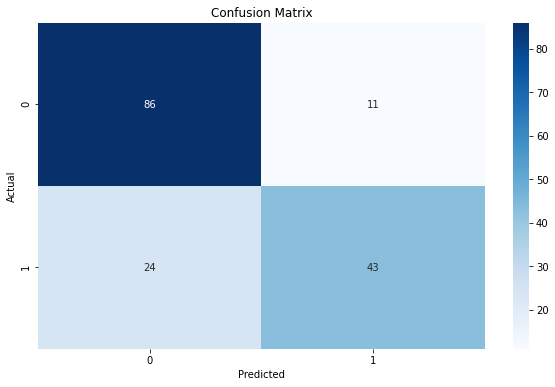

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot= True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()